In [1]:
!pip install umap-learn
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import socket
import glob
import numpy as np

from sklearn import preprocessing
import numpy as np

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import umap
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82816 sha256=e808b42a05e4a1e09f12f99c8817cb448fb9417175d3e4f370854ea5b51b3777
  Stored in directory: /root/.cache/pip/wheels/a0/e8/c6/a37ea663620bd5200ea1ba0907ab3c217042c1d035ef606acc
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55622 sha256=c38b335dd5f1d9c68794f85d0bbdfc6559324b06835c7f5288a2297134407aec
  Stored in directory: /root/.cache/pip/wheels/4a/38/5d/f60a40a66a9512b7e5e83517ebc2d1b42d857be97d135f1096
Successfully built umap-learn pynndescent


In [17]:
df = []
#df.append(pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ALL.csv'))
df.append(pd.read_csv('/content/drive/MyDrive/Colab Notebooks/only_malware_ad_sc_ran.csv'))
df = pd.concat(df, ignore_index=True)

df = df.drop(['Unnamed: 0'],axis=1)

df = df.dropna()

df.head(10)


,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,57050,6.0,15,2,0,42.0,0.0,42.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE
1,57050,443,6.0,10067,3,0,42.0,0.0,42.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE
2,50481,40019,6.0,45658,1,1,0.0,0.0,0.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE
3,60517,443,6.0,50235,1,1,0.0,0.0,0.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE
4,54219,443,6.0,50260,1,1,0.0,0.0,0.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE
5,56696,443,6.0,50282,1,1,0.0,0.0,0.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE
6,55083,443,6.0,50354,1,2,0.0,0.0,0.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE
7,48664,443,6.0,50703,1,1,0.0,0.0,0.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE
8,56349,12350,6.0,119911,1,1,0.0,0.0,0.0,0.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE
9,52297,443,6.0,37712,1,1,31.0,0.0,31.0,31.0,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ADWARE


In [3]:
print(df[' Label'].unique())

['ADWARE' 'SCAREWARE' 'RANSOMWARE']


In [4]:
#zmiana etykiet na liczby

le = LabelEncoder() #przekształca etykiety nienumeryczne w 'Label' na numeryczne
df[' Label'] = le.fit_transform(df[' Label'])

print(df[' Label'].unique())

[0 2 1]


In [11]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

# Sample the data - 100k
#df_sample = df.sample(100000)
df_sample = df.sample(1000)
X, y = df_sample.drop(' Label', axis=1), df_sample[[' Label']].values.flatten()

# Preprocess
pipe = make_pipeline(SimpleImputer(strategy="mean"))
X = pipe.fit_transform(X.copy())

UMAP

In [12]:
manifold = umap.UMAP().fit(X, y)
X_reduced = manifold.transform(X)

In [13]:
X_reduced.shape

(1000, 2)

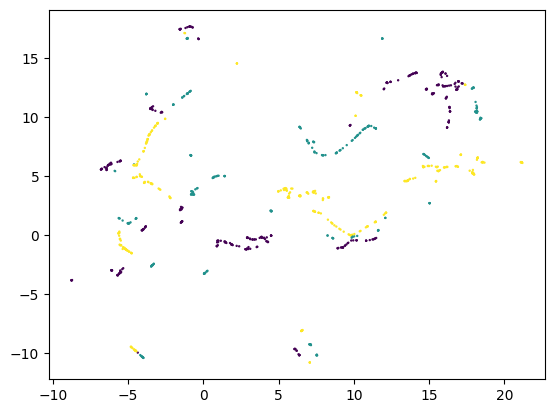

In [14]:
import matplotlib.pyplot as plt
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, s=0.5);

In [15]:
from sklearn.preprocessing import QuantileTransformer

# Preprocess again
pipe = make_pipeline(SimpleImputer(strategy="mean"), QuantileTransformer())
X = pipe.fit_transform(X.copy())

# Fit UMAP to processed data
manifold = umap.UMAP().fit(X, y)
X_reduced_2 = manifold.transform(X)

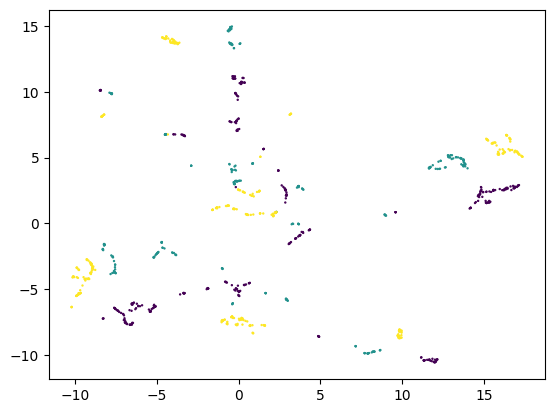

In [16]:
plt.scatter(X_reduced_2[:, 0], X_reduced_2[:, 1], c=y, s=0.5);

KONIEC